In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout 



In [17]:
max_words = 10000 
max_len=500 

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_words)

print(f"Dataset Loaded:\n Train samples: {len(x_train)}\n Test samples: {len(x_test)}")

Dataset Loaded:
 Train samples: 25000
 Test samples: 25000


In [18]:
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test= sequence.pad_sequences(x_test,maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


Training data shape: (25000, 500)
Testing data shape: (25000, 500)


In [20]:
model=Sequential([
    Embedding(input_dim=max_words,output_dim=128,input_length=max_len),
    LSTM(128,return_sequences=True),
    Dropout(0.2),
    LSTM(64,return_sequences=False),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary() 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history=model.fit(
    x_train,y_train,
    epochs=5,
    validation_data=(x_test,y_test),
    batch_size=64,
    verbose=1   
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 650s 2s/step - accuracy: 0.8515 - loss: 0.3531 - val_accuracy: 0.7724 - val_loss: 0.5039
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.8895 - loss: 0.2779 - val_accuracy: 0.8708 - val_loss: 0.3126
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - accuracy: 0.9407 - loss: 0.1668 - val_accuracy: 0.8513 - val_loss: 0.3620
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 800s 2s/step - accuracy: 0.9426 - loss: 0.1574 - val_accuracy: 0.8588 - val_loss: 0.3754
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 584s 1s/step - accuracy: 0.9673 - loss: 0.1023 - val_accuracy: 0.8479 - val_loss: 0.4595


In [24]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f} %")


782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 154ms/step - accuracy: 0.8447 - loss: 0.4763

Test Accuracy: 84.79 %


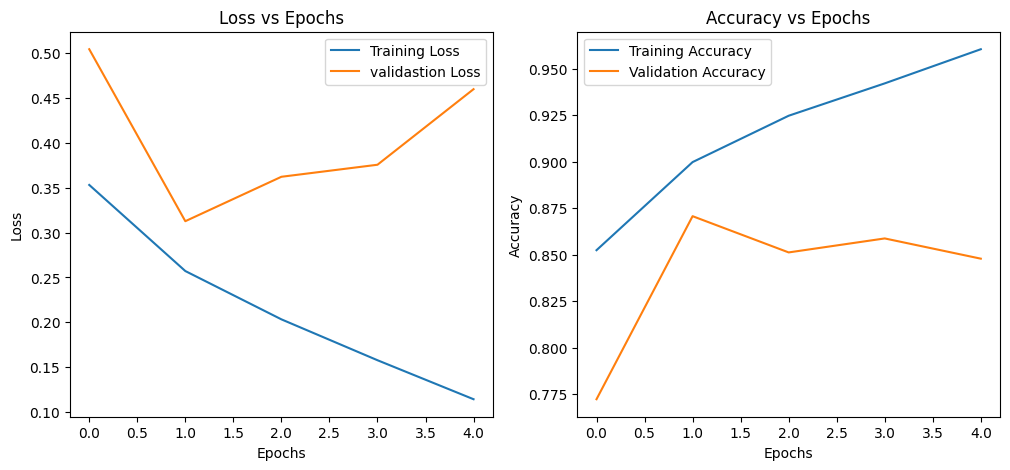

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="validastion Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [26]:
word_index = imdb.get_word_index()
reverse_word_index = {value:key for key,value in  word_index.items()}


In [27]:
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i-3,'?') for i in encoded_review])

indices = np.random.choice(len(x_test),5,replace=False)


In [28]:
for i in indices:
    prediction = model.predict(np.expand_dims(x_test[i],axis=0))[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"Decode Review:\n{decode_review(x_test[i])}\n")
    print(f"Predicted Sentiment: {sentiment} \n Confidence: {prediction*100:.2f} %\n")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Decode Review:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i'm not a big fan of movie musicals annie was a stage show i loved but the movie was a flop the phantom of the opera movies and i believe there were three failed to match the ? staging but i loved this the dvd will take a place of honour among my ? even 

In [ ]:
def preprocess_text(text):
    """
    Preprocess user input text to match the format expected by the model
    """
    # Convert text to lowercase and split into words
    words = text.lower().split()
    
    # Convert words to indices using the word_index dictionary
    encoded = []
    for word in words:
        if word in word_index:
            # Add 3 to match the offset used in IMDB dataset
            encoded.append(word_index[word] + 3)
        else:
            # Use 2 for unknown words (OOV - Out of Vocabulary)
            encoded.append(2)
    
    # Pad the sequence to max_len
    padded = sequence.pad_sequences([encoded], maxlen=max_len)
    return padded

def predict_sentiment(text):
    """
    Predict sentiment for a given text input
    """
    # Preprocess the text
    processed_text = preprocess_text(text)
    
    # Get prediction
    prediction = model.predict(processed_text)[0][0]
    
    # Determine sentiment
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100
    
    return sentiment, confidence

# Manual user input
user_input = "This movie was fantastic! I really loved it and would watch it again."

# Predict sentiment
sentiment, confidence = predict_sentiment(user_input)

print(f"User Input: {user_input}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Confidence: {confidence:.2f}%")

In [ ]:
# Interactive sentiment prediction
print("=== Interactive Sentiment Analysis ===")
print("Enter movie reviews to get sentiment predictions!")
print("Type 'quit' to exit\n")

while True:
    user_text = input("Enter a movie review: ").strip()
    
    if user_text.lower() == 'quit':
        print("Thank you for using the sentiment analyzer!")
        break
    
    if user_text:
        sentiment, confidence = predict_sentiment(user_text)
        print(f"\nInput: {user_text}")
        print(f"Predicted Sentiment: {sentiment}")
        print(f"Confidence: {confidence:.2f}%")
        print("-" * 50)

In [ ]:
# Test with example sentences
test_reviews = [
    "This movie was absolutely terrible! Worst film I've ever seen.",
    "Amazing cinematography and brilliant acting! Highly recommended.",
    "The plot was confusing and the characters were poorly developed.",
    "Fantastic storyline with great special effects. Loved every minute!",
    "Boring and predictable. I fell asleep halfway through.",
    "Incredible performance by the lead actor. A masterpiece!"
]

print("=== Testing with Example Reviews ===\n")

for i, review in enumerate(test_reviews, 1):
    sentiment, confidence = predict_sentiment(review)
    print(f"Review {i}: {review}")
    print(f"Prediction: {sentiment} ({confidence:.2f}% confidence)")
    print("-" * 70)